In [64]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import PIL.Image as pilimg

# Log를 만들때 사용합니다. 
from datetime import datetime
from tensorflow.python.keras.callbacks import TensorBoard
import os


# 헬퍼(helper) 라이브러리를 임포트합니다
import collections
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [8]:
# MINIST 데이터셋은 70,000 개,10개의 카테고리 28 * 28
# train 60,000 test 10,000
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
# print(np.size(train_labels))
# 이후 결과 출력을 위해 라벨링
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
[9 0 0 ... 3 0 5]
<class 'numpy.ndarray'>


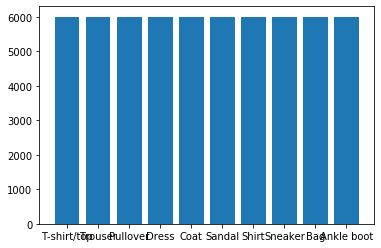

In [10]:
# 데이터의 경향 살펴보기
print(train_images.shape)
print(train_labels)
# 카데고리별 비율 
labels = [i for i in range(10)]
for target, cnt in collections.Counter(train_labels).items():
    labels[target] = cnt
plt.bar(range(10), labels)
plt.xticks(range(10), class_names)
print(type(train_images[0]))

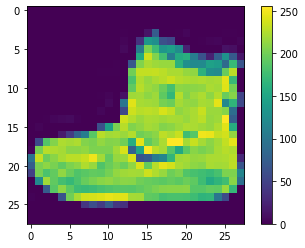

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# 전처리 (정규화)
train_images = train_images / 255.0

test_images = test_images / 255.0

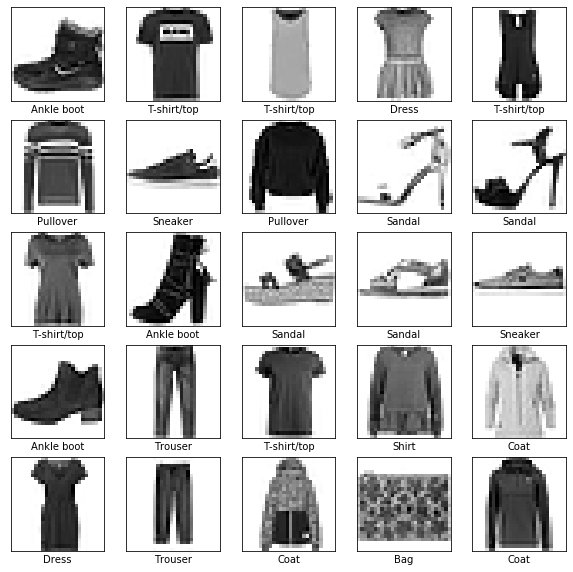

In [13]:
# 25개의 sample과 클래스를 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [93]:
# model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# softmax의 결과값은 현재 10개의 클래스 중 하나에 속할 확률을 출력함
# 텐서보드 그리기 
time = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
tensorboard = TensorBoard(os.path.join(os.getcwd(), 'logs',time))

In [94]:
# 모델 컴파일 
# 손실함수 , 옵티마이저, 지료
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
# 훈련 시작 
model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5037 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3773 - accuracy: 0.8633
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3413 - accuracy: 0.8743
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3140 - accuracy: 0.8842
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2980 - accuracy: 0.8899


In [102]:
# 정확도 평가 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)
print(np.shape(test_images))

10000/1 - 1s - loss: 0.2570 - accuracy: 0.8779

테스트 정확도: 0.8779
(10000, 28, 28)


In [12]:
# 훈력된 모델을 사용하여 이미지에 대한 예측 만들기 
predictions = model.predict(test_images)

In [103]:
predictions[0]

array([7.0890332e-05, 4.6961307e-07, 1.9922015e-06, 5.0307396e-08,
       8.7196795e-06, 5.5397390e-03, 1.8936285e-05, 1.5328092e-02,
       2.0185793e-05, 9.7901094e-01], dtype=float32)

In [14]:
print('예측 값',np.argmax(predictions[0]))
print('결과 값', test_labels[0])


예측 값 9
결과 값 9
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: test\assets


In [120]:
# 모델 저장하기 
model.save('test.h5')
# 모델 불러오기 
model = load_model('test.h5')
# 모델 사용하기 
xhat = pilimg.open('testdata.PNG').convert('L')
resized_image = np.array(xhat.resize((28, 28)))
x = np.expand_dims(resized_image, axis=0)
# print(x)
yhat = model.predict(x)
print(yhat)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


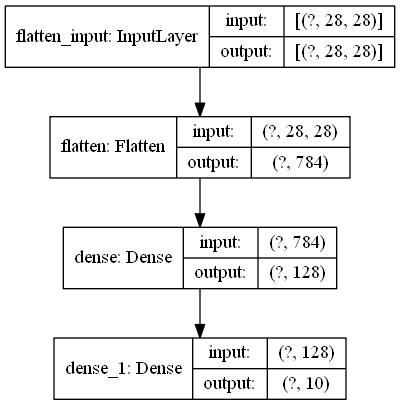

In [15]:
# 10개의 클래스에 대한 예측을 그래프로 표현 
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)
    